In [5]:
import h5py, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, sys

BEG_TEST = '../data/TestData/'

dfAgeSex = pd.read_csv(BEG_TEST + 'attributes.csv')
with h5py.File(BEG_TEST + 'ecg_tracings.hdf5') as f:
    M = np.array(f['tracings'])
dfLabels = pd.read_csv(BEG_TEST + 'annotations' + os.sep + 'gold_standard.csv')

In [6]:
dfLabels

,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
822,0,0,0,0,0,0
823,0,0,0,0,0,0
824,0,0,0,0,0,0
825,0,0,0,0,0,0


In [10]:
ELETRODO_IDX = 0

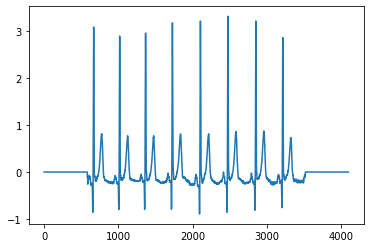

In [11]:
plt.plot(M[0,:,ELETRODO_IDX])

In [14]:
labels = dfLabels.values
labels.shape

(827, 6)

In [25]:
N = len(labels)
LABELS = '1dAVb	RBBB	LBBB	SB	AF	ST'.split()
tipos = [[] for i in range(6)]
for i in range(N):
    row = labels[i]
    if row.sum() == 1:
        ecg = M[i, :, ELETRODO_IDX]
        tipos[row.argmax()].append(ecg)

In [43]:
M.shape

(827, 4096, 12)

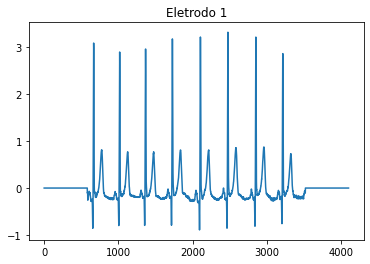

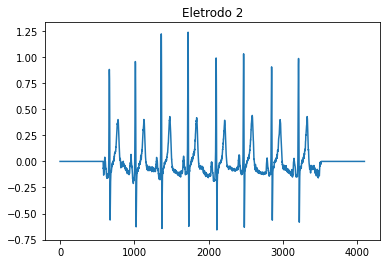

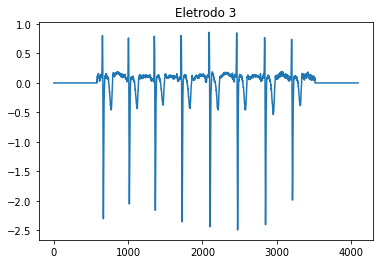

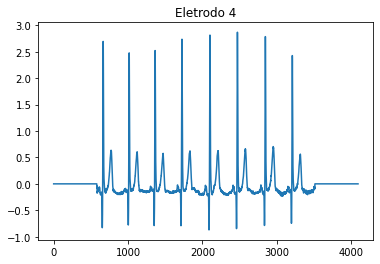

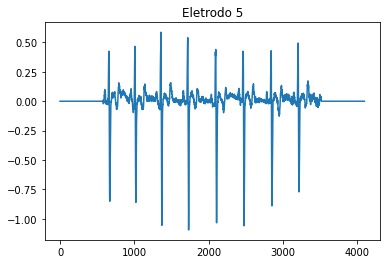

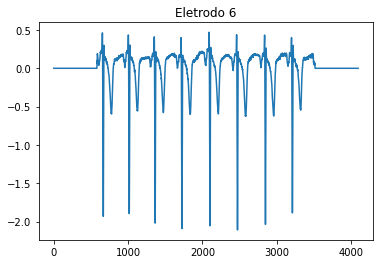

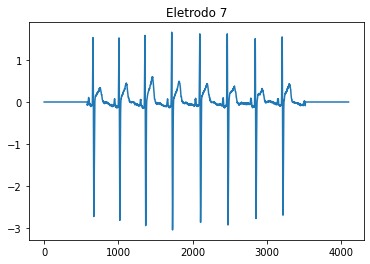

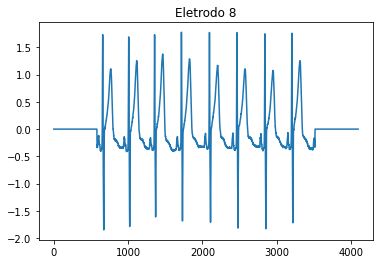

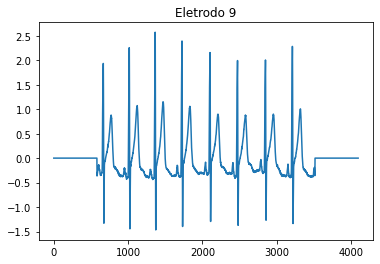

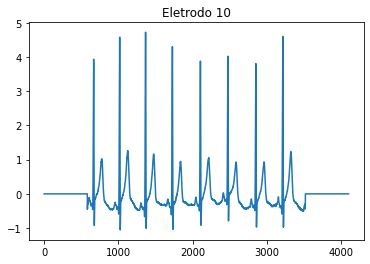

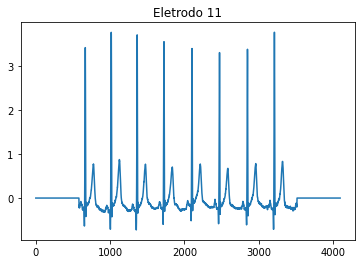

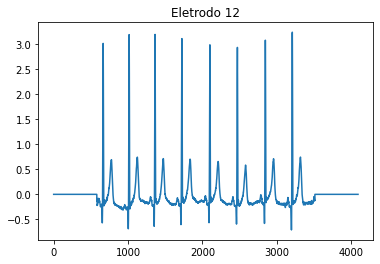

In [47]:
# exemplo do mesmo ecg em cada eletrodo
pessoa = 0
for i in range(12):
    ecg = M[pessoa, :, i]
    plt.plot(ecg)
    plt.title('Eletrodo ' + str(i + 1))
    plt.show()

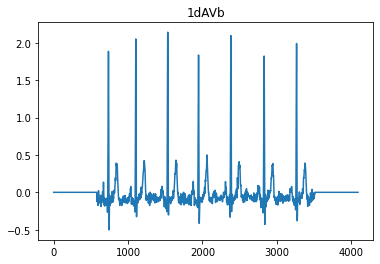

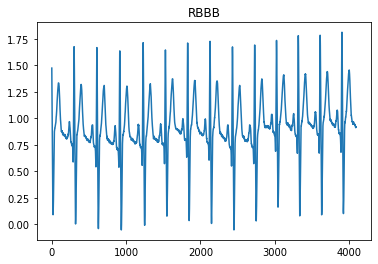

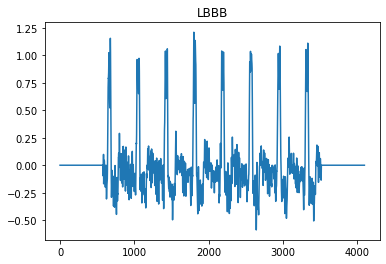

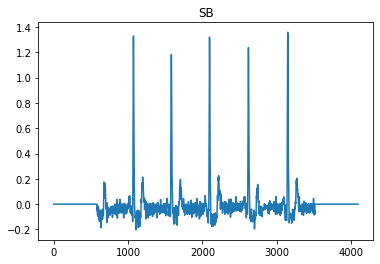

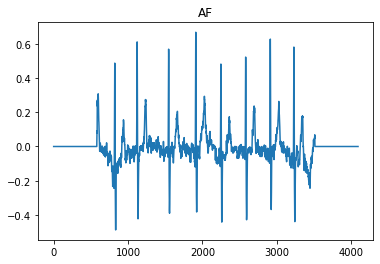

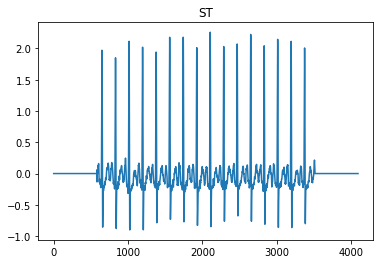

In [42]:
# um exemplo de cada doença sozinha no eletrodo 0
rng = np.random.default_rng(243)
for i in range(6):
    tipo = tipos[i]
    exemplo = rng.choice(tipo)
    plt.plot(exemplo)
    plt.title(LABELS[i])
    plt.show()